In [1]:
import pandas as pd
import numpy as np 
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
#kaggle.api.dataset_download_files('syedanwarafridi/vehicle-sales-data','csv_files',unzip=True,quiet=False)

In [3]:
df=pd.read_csv('csv_files/car_prices.csv')

In [4]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [5]:
(df.isna().mean()*100).round(2)
#percentage of NaN values

year             0.00
make             1.84
model            1.86
trim             1.91
body             2.36
transmission    11.69
vin              0.00
state            0.00
condition        2.12
odometer         0.02
color            0.13
interior         0.13
seller           0.00
mmr              0.01
sellingprice     0.00
saledate         0.00
dtype: float64

In [6]:
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [8]:
df=df.drop(columns='vin') #we don't need this column
df=df.drop(columns='seller') #we don't need this column

###### Convert saledate to date format

In [9]:
saledate=df['saledate'].apply(lambda x :' '.join(x.split('GMT')[0].strip().split(' ')[:-1]) if isinstance(x,str) else None)
df['saledate']=pd.to_datetime(saledate,errors='coerce')

### EDA

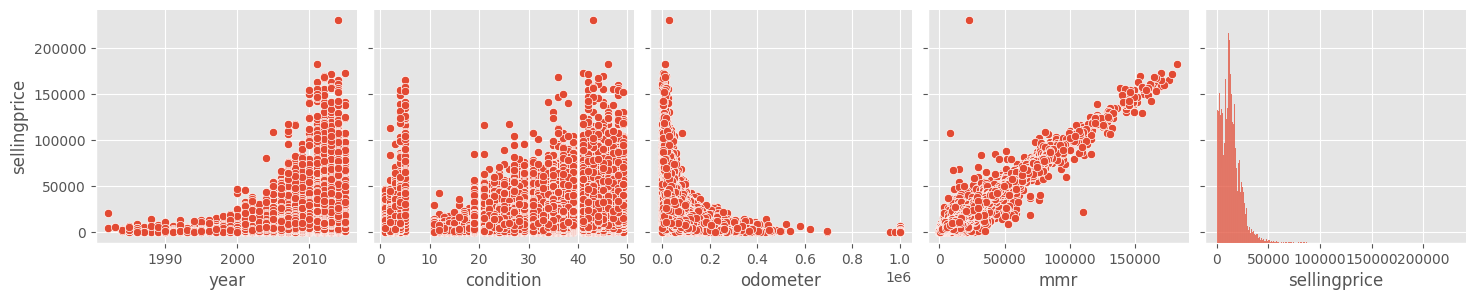

In [10]:
sns.pairplot(data=df,y_vars='sellingprice',height=3,kind='scatter')
plt.show()

In [11]:
# year, condition and odometer influnce selling price

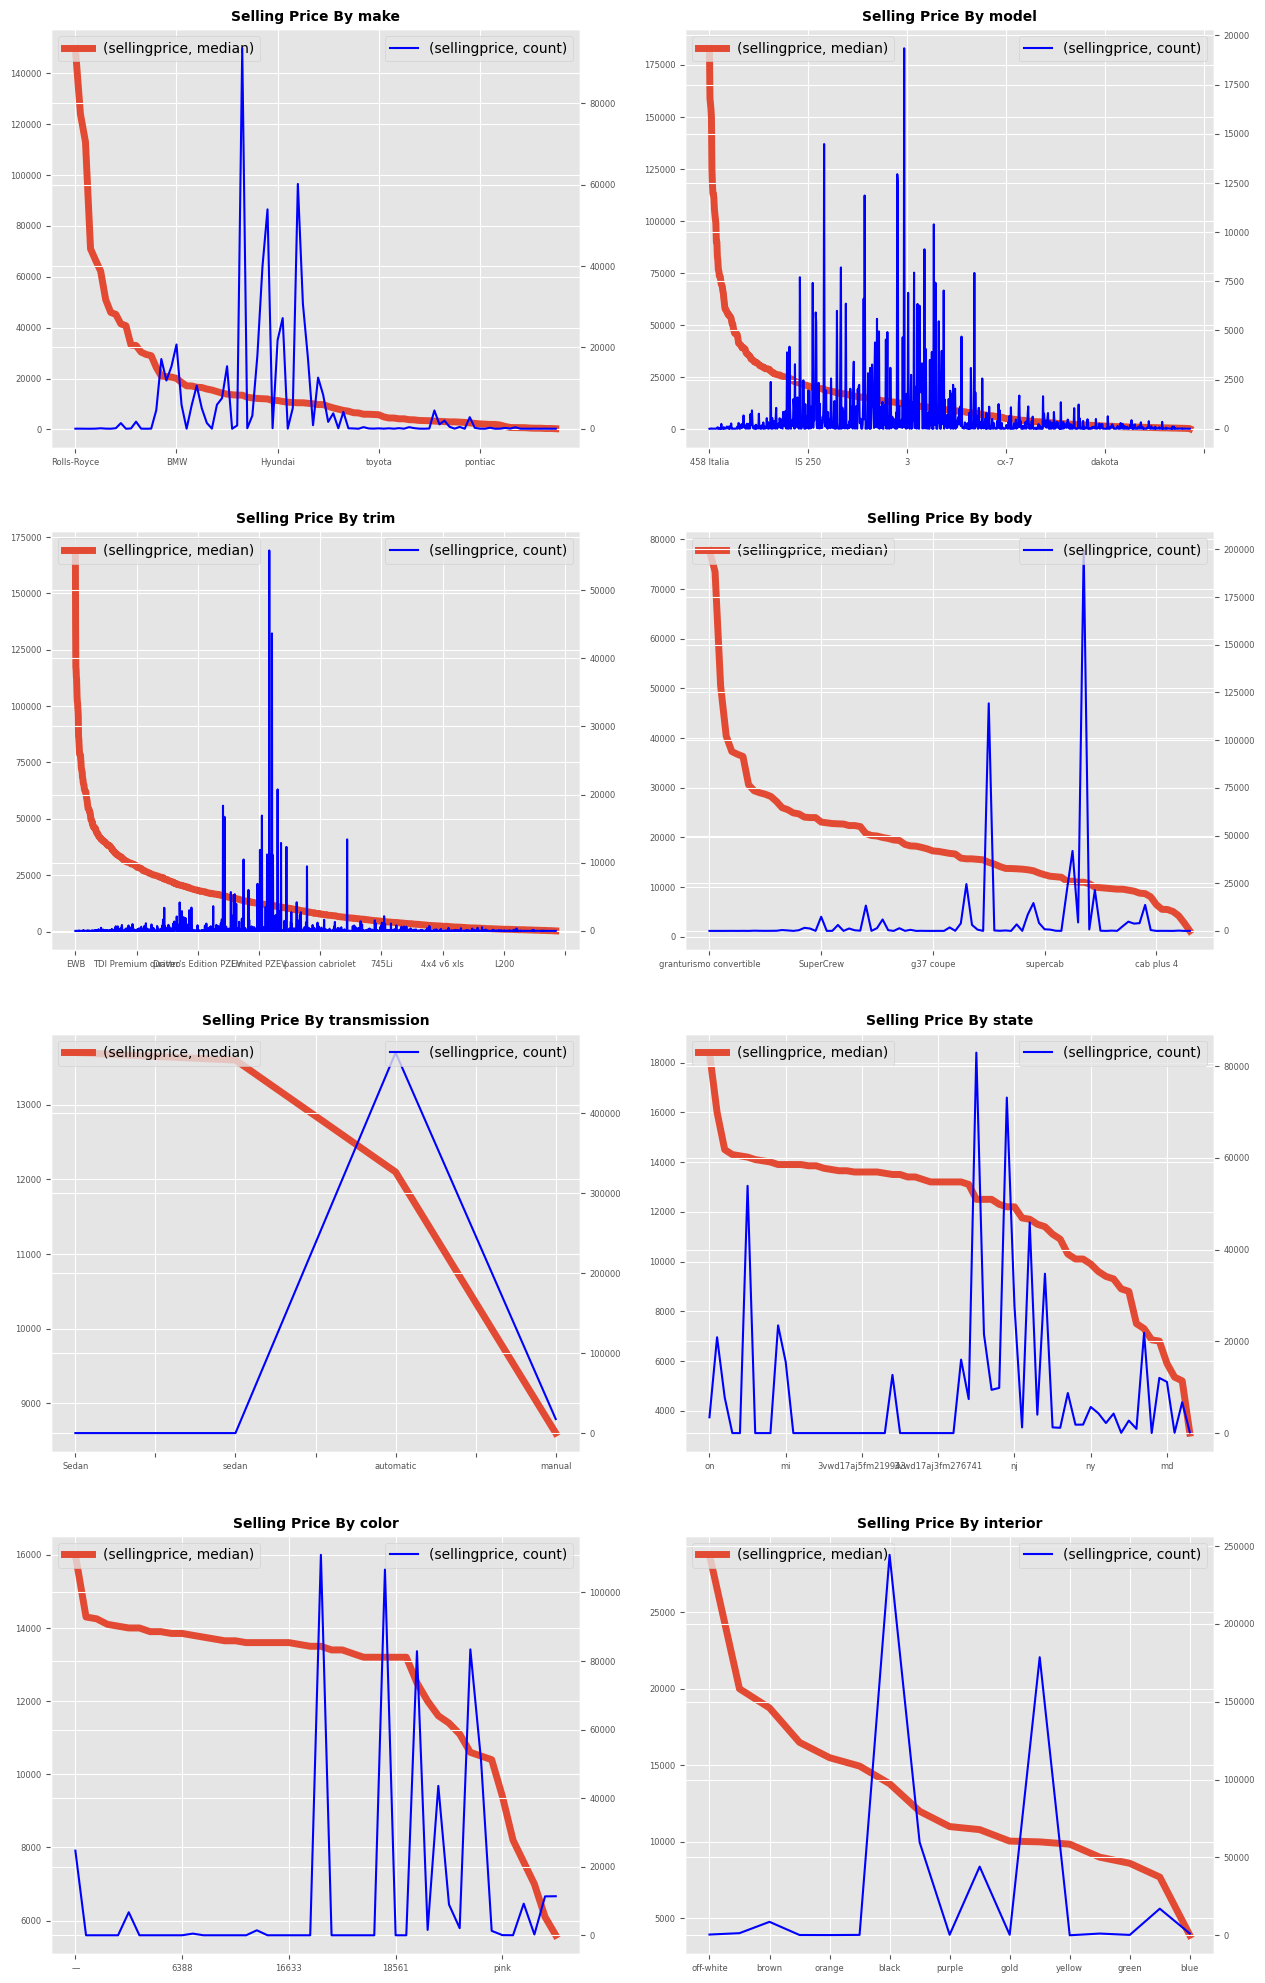

<Figure size 640x480 with 0 Axes>

In [12]:
fig,axes=plt.subplots(4,2,figsize=(15,25))
columns=df.select_dtypes(object).columns

for col,ax in zip(columns,axes.ravel()):
    grouped=df.groupby(col).agg({'sellingprice':['median','count']}).sort_values(('sellingprice', 'median'),ascending=False)

    ax2=ax.twinx()
    grouped.plot(ax=ax,y=('sellingprice', 'median'),lw=5,fontsize=6)
    grouped.plot(ax=ax2,y=('sellingprice', 'count'),color='blue',fontsize=6)
    ax.set_title(f'Selling Price By {col}',fontweight='bold',size=10)
    ax.set_xlabel('')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
plt.show()
plt.tight_layout()
plt.show()

In [13]:
#there are entries with sellingprice=1, which are outliers
#also there many rare labels

In [14]:
df=df[df['sellingprice']>100] #removing outliers

make

In [15]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [16]:
import re

def has_no_capital_letters(text):
    return not bool(re.search(r'[A-Z]', text))

bad_make_labels=[make for make in df['make'].dropna().unique() if has_no_capital_letters(make)]
make_labels_dict={bad_make_label:bad_make_label.title() for bad_make_label in bad_make_labels}
make_labels_dict

{'lincoln': 'Lincoln',
 'bmw': 'Bmw',
 'ford': 'Ford',
 'mitsubishi': 'Mitsubishi',
 'smart': 'Smart',
 'chevrolet': 'Chevrolet',
 'chrysler': 'Chrysler',
 'pontiac': 'Pontiac',
 'landrover': 'Landrover',
 'cadillac': 'Cadillac',
 'land rover': 'Land Rover',
 'mercedes': 'Mercedes',
 'mazda': 'Mazda',
 'toyota': 'Toyota',
 'lexus': 'Lexus',
 'gmc truck': 'Gmc Truck',
 'honda': 'Honda',
 'nissan': 'Nissan',
 'porsche': 'Porsche',
 'dodge': 'Dodge',
 'subaru': 'Subaru',
 'oldsmobile': 'Oldsmobile',
 'hyundai': 'Hyundai',
 'jeep': 'Jeep',
 'dodge tk': 'Dodge Tk',
 'acura': 'Acura',
 'volkswagen': 'Volkswagen',
 'suzuki': 'Suzuki',
 'kia': 'Kia',
 'audi': 'Audi',
 'gmc': 'Gmc',
 'maserati': 'Maserati',
 'mazda tk': 'Mazda Tk',
 'mercury': 'Mercury',
 'buick': 'Buick',
 'hyundai tk': 'Hyundai Tk',
 'mercedes-b': 'Mercedes-B',
 'vw': 'Vw',
 'chev truck': 'Chev Truck',
 'ford tk': 'Ford Tk',
 'plymouth': 'Plymouth',
 'ford truck': 'Ford Truck',
 'airstream': 'Airstream',
 'dot': 'Dot'}

In [17]:
df['make']=df['make'].apply(lambda x:make_labels_dict[x] if x in make_labels_dict else x)

In [18]:
sorted(df['make'].dropna().unique().tolist())

['Acura',
 'Airstream',
 'Aston Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Bmw',
 'Buick',
 'Cadillac',
 'Chev Truck',
 'Chevrolet',
 'Chrysler',
 'Daewoo',
 'Dodge',
 'Dodge Tk',
 'Dot',
 'FIAT',
 'Ferrari',
 'Fisker',
 'Ford',
 'Ford Tk',
 'Ford Truck',
 'GMC',
 'Geo',
 'Gmc',
 'Gmc Truck',
 'HUMMER',
 'Honda',
 'Hyundai',
 'Hyundai Tk',
 'Infiniti',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Lamborghini',
 'Land Rover',
 'Landrover',
 'Lexus',
 'Lincoln',
 'Lotus',
 'MINI',
 'Maserati',
 'Mazda',
 'Mazda Tk',
 'Mercedes',
 'Mercedes-B',
 'Mercedes-Benz',
 'Mercury',
 'Mitsubishi',
 'Nissan',
 'Oldsmobile',
 'Plymouth',
 'Pontiac',
 'Porsche',
 'Ram',
 'Rolls-Royce',
 'Saab',
 'Saturn',
 'Scion',
 'Smart',
 'Subaru',
 'Suzuki',
 'Tesla',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'Vw']

In [19]:
make_labels_dict_2={
    'Bmw':'BMW',
    'Ford Tk':'Ford Truck',
    'Gmc':'GMC',
    'Gmc Truck':'GMC Truck',
    'Landrover':'Land Rover',
    'Mercedes-B':'Mercedes-Benz',
    'Mercedes':'Mercedes-Benz',
    'Vw':'Volkswagen',
}

df['make']=df['make'].apply(lambda x:make_labels_dict_2[x] if x in make_labels_dict_2 else x)

In [20]:
df['make']=df['make'].str.replace(' Tk', ' Truck',regex=True)

In [21]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', nan, 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'Smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'GMC Truck', 'Saab',
       'Suzuki', 'Oldsmobile', 'Isuzu', 'Dodge Truck', 'Geo',
       'Rolls-Royce', 'Mazda Truck', 'Hyundai Truck', 'Daewoo',
       'Chev Truck', 'Ford Truck', 'Plymouth', 'Tesla', 'Airstream',
       'Dot', 'Aston Martin', 'Fisker', 'Lamborghini', 'Lotus'],
      dtype=object)

In [22]:
df['make'].nunique()

61

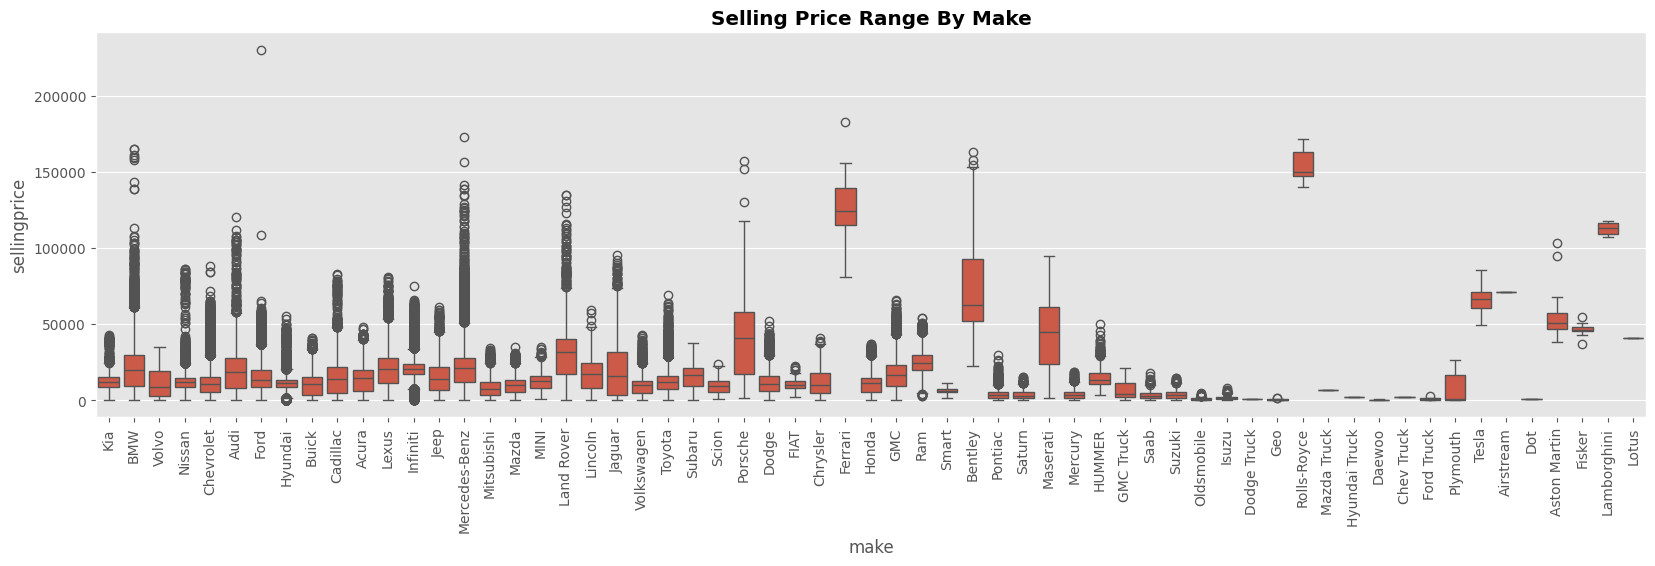

In [23]:
plt.figure(figsize=(20,5))
sns.boxplot(df,x='make',y='sellingprice')
plt.title('Selling Price Range By Make',fontweight='bold')
plt.xticks(rotation=90)
plt.show()

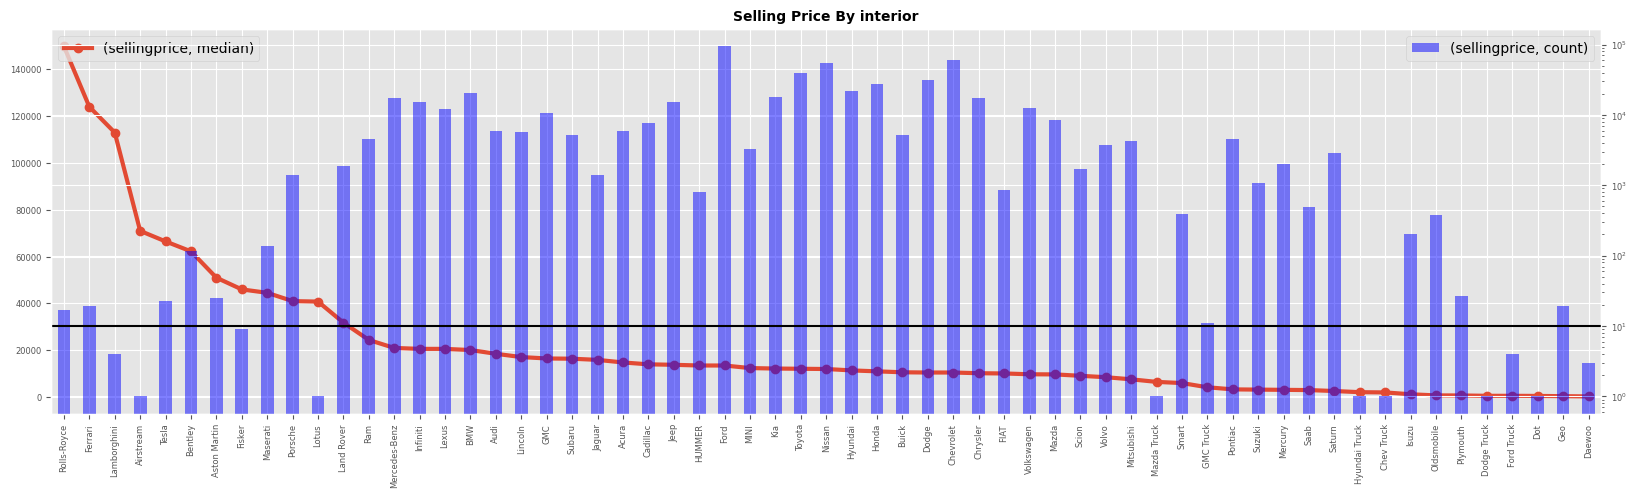

In [24]:
grouped=df.groupby('make').agg({'sellingprice':['median','count']}).sort_values(('sellingprice', 'median'),ascending=False)

fig,ax=plt.subplots(figsize=(20,5))
ax2=ax.twinx()
grouped.plot(ax=ax,y=('sellingprice', 'median'),lw=3,fontsize=6,marker='o')
grouped.plot.bar(ax=ax2,y=('sellingprice', 'count'),color='blue',fontsize=6,alpha=0.5)
ax.set_title(f'Selling Price By {col}',fontweight='bold',size=10)
ax.set_xlabel('')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_xticklabels(grouped.index,rotation=90)
ax2.set_yscale('log')
ax2.axhline(10,color='black')
plt.show()

In [25]:
#some of the manufacturer brands are represented less than 10 times. some are represented just once

In [26]:
rare_labels=df['make'].value_counts()[df['make'].value_counts()<=3].index
df['make']=df['make'].apply(lambda x:'Rare Label' if x in rare_labels else x)

model

In [27]:
rare_labels=df['model'].value_counts()[df['model'].value_counts(normalize=True)<=0.0001].index
df['model']=df['model'].apply(lambda x:'Rare Label' if x in rare_labels else x)

body

In [28]:
df['body']=df['body'].str.title()

transmission

In [29]:
df['transmission'].unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

In [30]:
df['transmission'].value_counts(normalize=True)

transmission
automatic    0.964394
manual       0.035553
sedan        0.000030
Sedan        0.000022
Name: proportion, dtype: float64

In [31]:
df['transmission']=df['transmission'].apply(lambda x:x if x in ['automatic','manual'] else np.nan)

state

In [32]:
df['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

In [33]:
df['state']=df['state'].apply(lambda x:x if len(x)==2 else None)

In [34]:
df['state']=df['state'].str.upper()

condition

<Axes: >

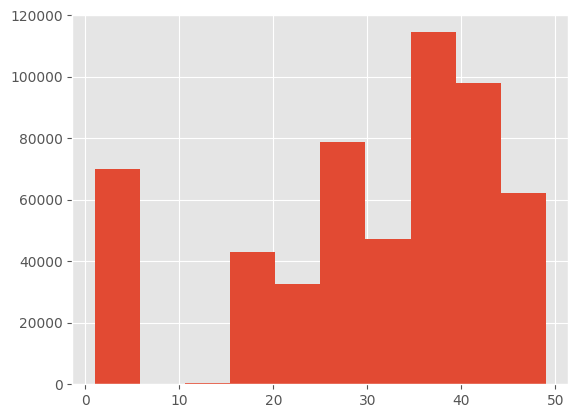

In [35]:
df['condition'].hist(bins=10)

<Axes: title={'center': 'odometer vs sellingprice'}, xlabel='condition', ylabel='sellingprice'>

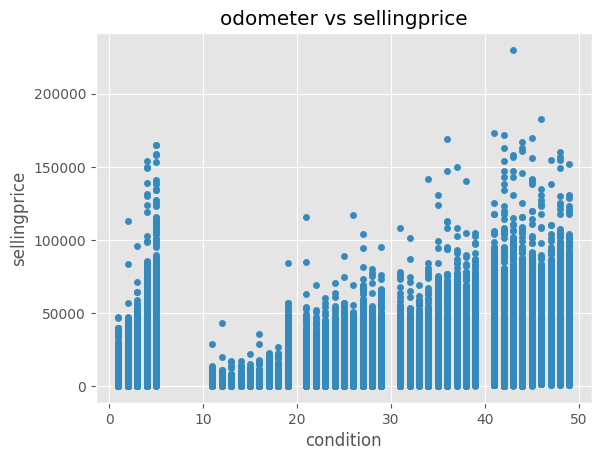

In [36]:
df.plot.scatter(x='condition',y='sellingprice',title='odometer vs sellingprice')

In [37]:
# some condition values range between 1 and 5, some bewteen 10 and 50
# scale is different for these two groups
#1==10, 2==20... 5==50 as I undersand it

In [38]:
df['condition']=df['condition'].apply(lambda x:x*10 if x<=5 else x)

<Axes: title={'center': 'odometer vs sellingprice'}, xlabel='condition', ylabel='sellingprice'>

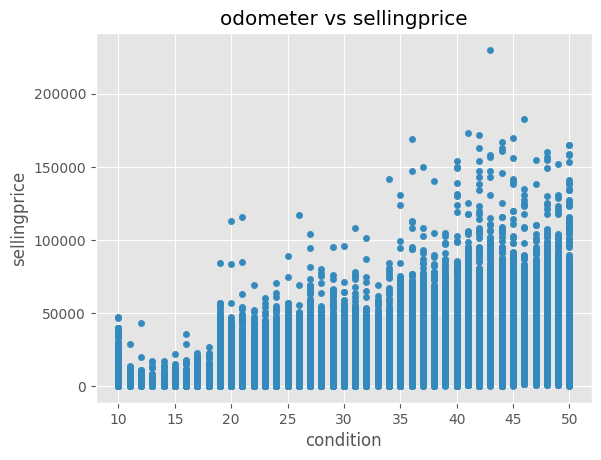

In [39]:
df.plot.scatter(x='condition',y='sellingprice',title='odometer vs sellingprice') #after transformation

<Axes: >

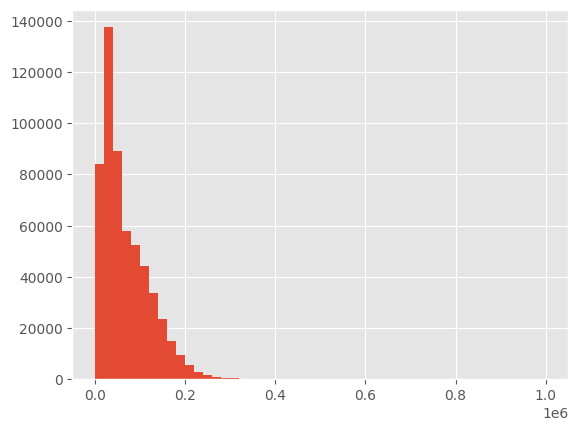

In [40]:
df['odometer'].hist(bins=50)

In [41]:
df['odometer'].value_counts(ascending=False)

odometer
1.0         1316
999999.0      71
10.0          29
21587.0       21
8.0           18
            ... 
133054.0       1
166147.0       1
121927.0       1
44874.0        1
262065.0       1
Name: count, Length: 172271, dtype: int64

color

In [42]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

In [43]:
colors=[]

for color in df['color']:
    if any([i in str(color) for i in ['1','2','3','4','5','6','7','8','9']]):
        colors.append(None)
    else:
        colors.append(color)

df['color']=colors

df['color']=colors

In [44]:
df['color']=df['color'].replace('—',np.nan)

In [45]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', nan, 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime',
       None], dtype=object)

interior

In [46]:
df['interior'].unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

In [47]:
df['interior']=df['interior'].replace('—',np.nan)

saledate

In [48]:
df['car age']=df['saledate'].dt.year-df['year']+1

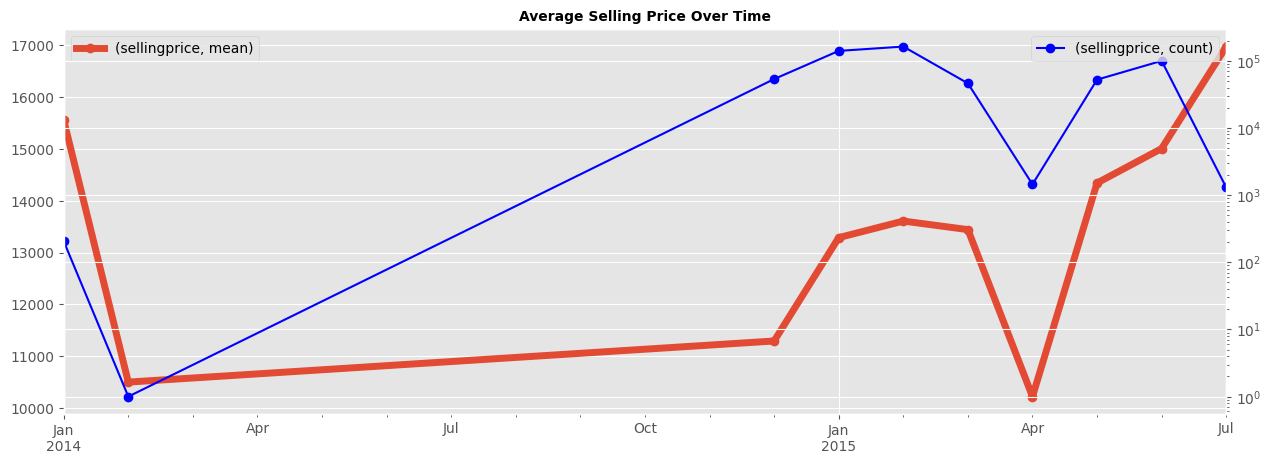

In [49]:
grouped=df.groupby(df['saledate'].dt.to_period('M')).agg({'sellingprice':['mean','count']})

fig,ax=plt.subplots(figsize=(15,5))
ax2=ax.twinx()

grouped.plot(ax=ax,y=('sellingprice', 'mean'),lw=5,marker='o')
grouped.plot(ax=ax2,y=('sellingprice', 'count'),color='blue',marker='o')
ax.set_title(f'Average Selling Price Over Time',fontweight='bold',size=10)
ax.set_xlabel('')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_yscale('log')

In [50]:
df=df.drop(columns='saledate')

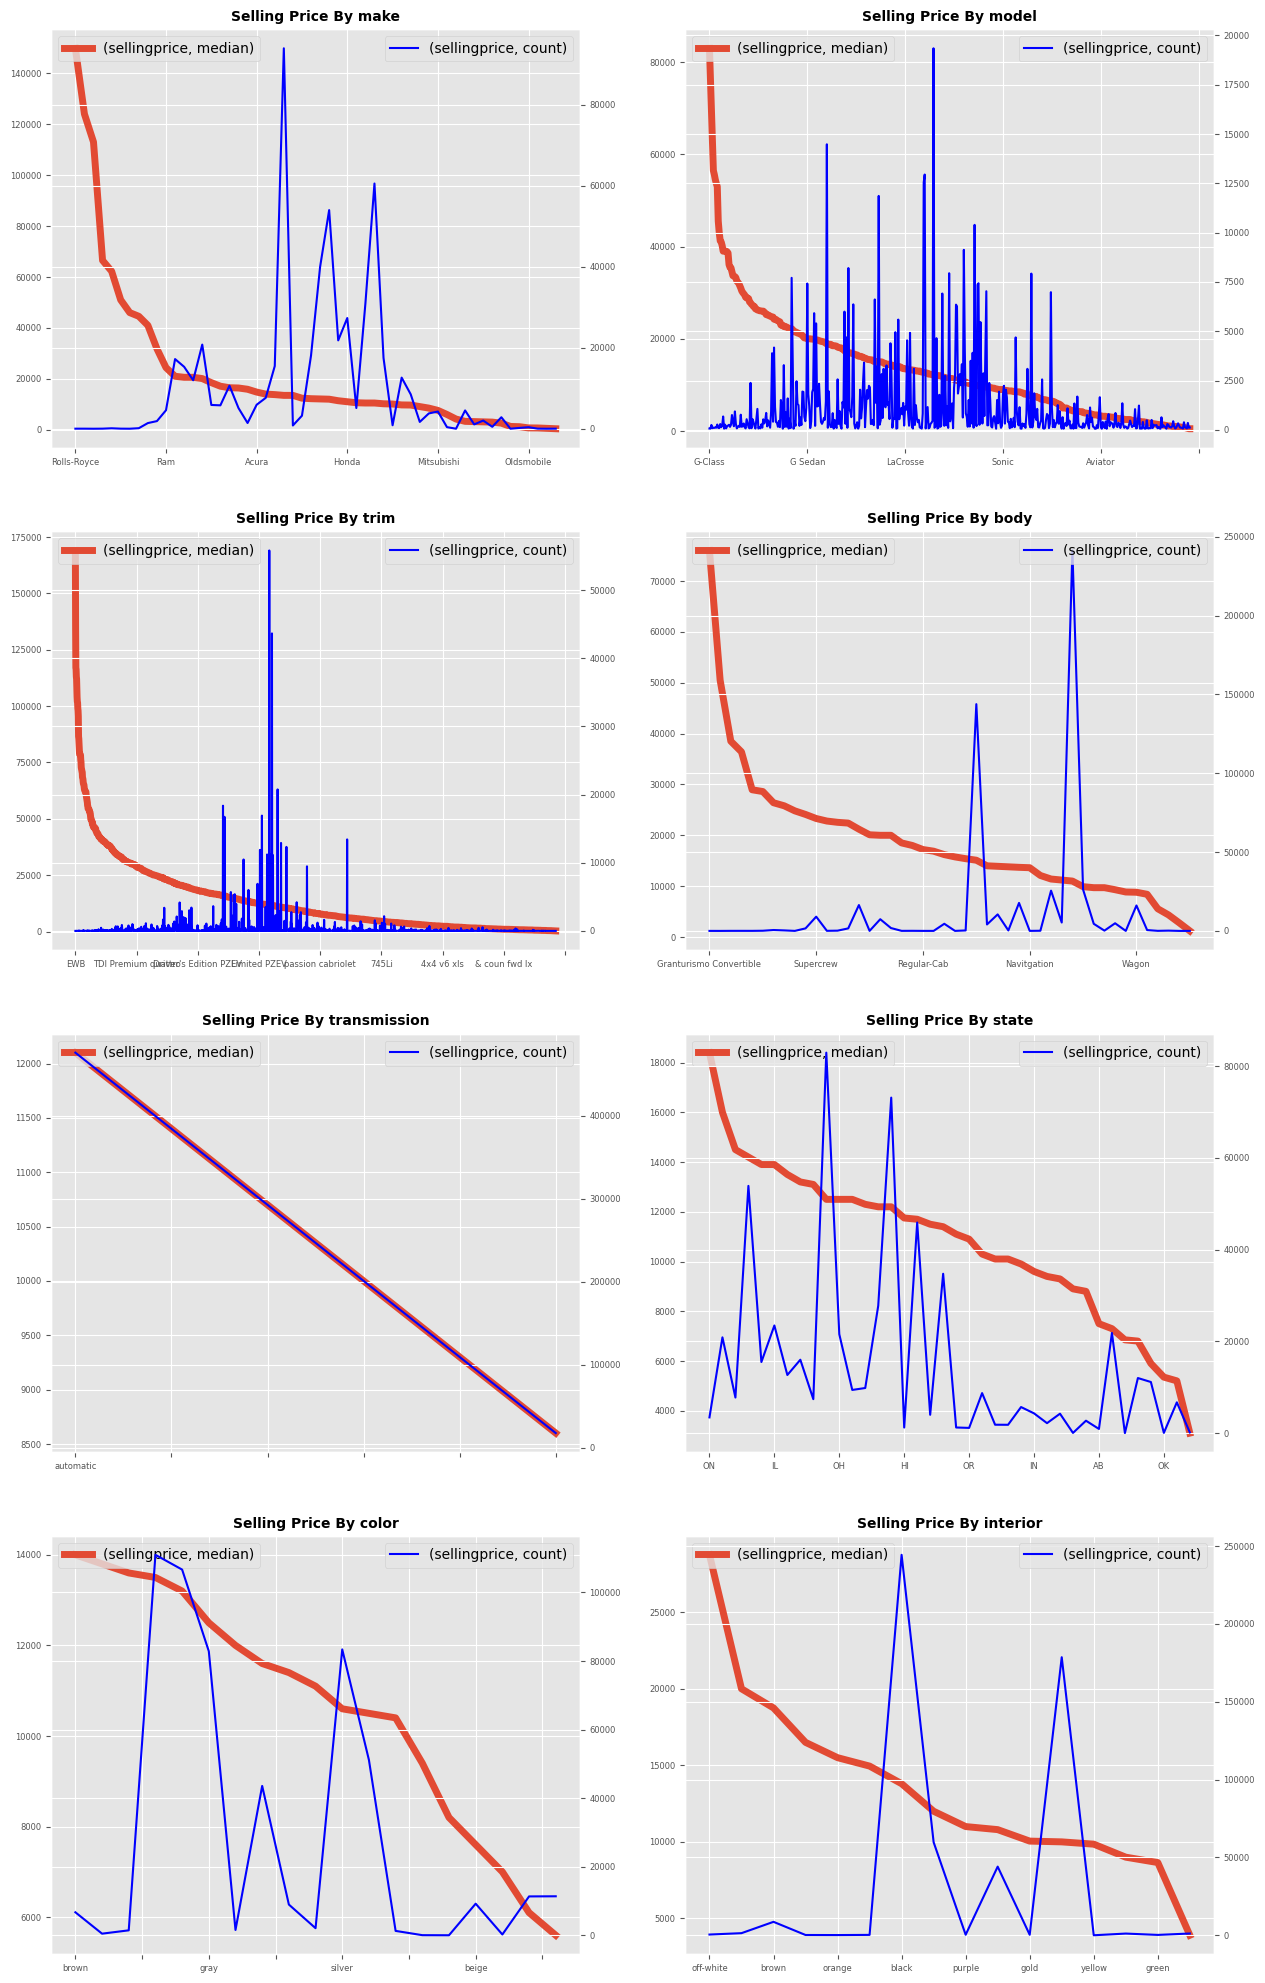

<Figure size 640x480 with 0 Axes>

In [51]:
fig,axes=plt.subplots(4,2,figsize=(15,25))
columns=df.select_dtypes(object).columns

for col,ax in zip(columns,axes.ravel()):
    grouped=df.groupby(col).agg({'sellingprice':['median','count']}).sort_values(('sellingprice', 'median'),ascending=False)

    ax2=ax.twinx()
    grouped.plot(ax=ax,y=('sellingprice', 'median'),lw=5,fontsize=6)
    grouped.plot(ax=ax2,y=('sellingprice', 'count'),color='blue',fontsize=6)
    ax.set_title(f'Selling Price By {col}',fontweight='bold',size=10)
    ax.set_xlabel('')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
plt.show()
plt.tight_layout()
plt.show()

In [52]:
(df.isna().mean()*100).round(2)

year             0.00
make             1.84
model            1.86
trim             1.91
body             2.36
transmission    11.70
state            0.00
condition        2.12
odometer         0.02
color            4.56
interior         3.19
mmr              0.00
sellingprice     0.00
car age          0.00
dtype: float64

In [53]:
for col in df.select_dtypes(object):
    dummies=pd.get_dummies(df[col],prefix=col,dummy_na=False)
    df=df.drop(columns=col)
    df=pd.concat([df,dummies],axis=1)

In [54]:
df

,year,condition,odometer,mmr,sellingprice,car age,make_Acura,make_Aston Martin,make_Audi,make_BMW,...,interior_gray,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
0,2015,50.0,16639.0,20500.0,21500.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,50.0,9393.0,20800.0,21500.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2014,45.0,1331.0,31900.0,30000.0,2.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2015,41.0,14282.0,27500.0,27750.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,43.0,2641.0,66000.0,67000.0,1.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,45.0,18255.0,35300.0,33000.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
558833,2012,50.0,54393.0,30200.0,30800.0,4.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
558834,2012,48.0,50561.0,29800.0,34000.0,4.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
558835,2015,38.0,16658.0,15100.0,11100.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# ML Model

In [55]:
X=df.drop(columns='sellingprice')
y=df['sellingprice']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [56]:
from xgboost import XGBRegressor
model=XGBRegressor()

In [57]:
model.fit(X_train,y_train)

c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\berid\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

In [59]:
from sklearn import metrics
r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'RMSE_test':rmse_test}
print(train_scores)
print(test_scores)

{'R2_train': 0.9765949080778911, 'MAE_train': 908.4983697071367, 'RMSE_train': 1472.324910677404}
{'R2_test': 0.9746548256789939, 'MAE_test': 923.7483296466496, 'RMSE_test': 1526.1805982202131}


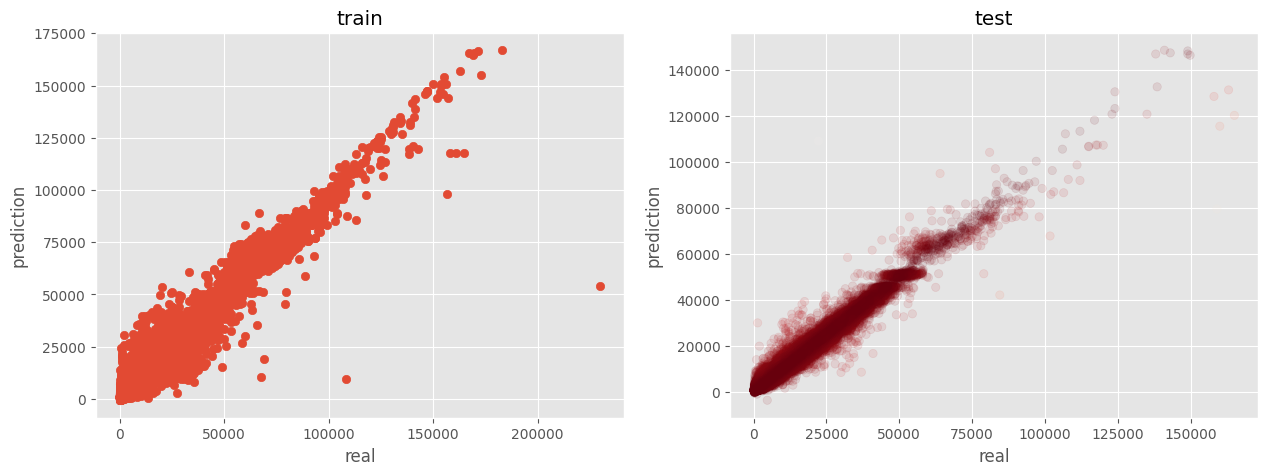

In [60]:
abs_error=np.abs(y_test-test_prediction)

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(y_train,train_prediction)
ax1.set_xlabel('real')
ax1.set_ylabel('prediction')
ax1.set_title('train')
ax2.scatter(y_test,test_prediction,c=abs_error,cmap='Reds_r',alpha=0.1)
ax2.set_xlabel('real')
ax2.set_ylabel('prediction')
ax2.set_title('test')
plt.show()

In [63]:
X_test['Actual']=y_test
X_test['prediction']=test_prediction
X_test['ABS Error']=abs_error

In [ ]:
# dummies to series

In [64]:
X_test

,year,condition,odometer,mmr,car age,make_Acura,make_Aston Martin,make_Audi,make_BMW,make_Bentley,...,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow,Actual,prediction,ABS Error
493529,2004,19.0,210618.0,2850.0,12.0,False,False,False,False,False,...,False,False,False,False,False,False,False,4100.0,2471.496338,1628.503662
179116,2001,19.0,155572.0,1975.0,15.0,False,False,False,False,False,...,False,False,False,False,False,False,False,2400.0,1798.079834,601.920166
300889,2000,36.0,239714.0,2925.0,16.0,False,False,False,False,False,...,False,False,False,False,False,False,False,2700.0,3777.466797,1077.466797
246164,2002,20.0,139801.0,1750.0,14.0,False,False,False,False,False,...,False,False,False,False,False,False,False,1750.0,1457.901367,292.098633
244243,2008,27.0,68815.0,16200.0,8.0,False,False,False,False,False,...,False,False,False,False,False,False,False,18700.0,15634.873047,3065.126953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307075,2012,41.0,62420.0,8725.0,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,9000.0,9216.599609,216.599609
96227,2013,47.0,1926.0,43000.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,43250.0,42457.902344,792.097656
445537,2013,50.0,30280.0,30100.0,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,30800.0,30348.044922,451.955078
179555,2014,49.0,39519.0,16050.0,2.0,False,False,False,False,False,...,False,False,False,False,True,False,False,16500.0,16524.103516,24.103516


In [71]:
columns=pd.Series(X_test.columns[X_test.columns.str.contains('_')]).str.split('_').str[0].unique()
columns

array(['make', 'model', 'trim', 'body', 'transmission', 'state', 'color',
       'interior'], dtype=object)

In [84]:
for col in columns:
    series=X_test[X_test.columns[X_test.columns.str.contains(col)]].idxmax(axis=1).str.replace(f'{col}_','')
    series_to_df=pd.DataFrame(series,columns=[col])

    X_test=X_test.drop(columns=X_test.columns[X_test.columns.str.contains(col)])
    X_test=pd.concat([X_test,series_to_df],axis=1)
    print(col)

make
model
trim
body
transmission
state
color
interior


In [85]:
X_test


,year,condition,odometer,mmr,car age,Actual,prediction,ABS Error,make,model,trim,body,transmission,state,color,interior
493529,2004,19.0,210618.0,2850.0,12.0,4100.0,2471.496338,1628.503662,GMC,Yukon,Denali,Suv,automatic,CO,black,beige
179116,2001,19.0,155572.0,1975.0,15.0,2400.0,1798.079834,601.920166,Honda,Accord,EX V-6,Sedan,automatic,CA,black,gray
300889,2000,36.0,239714.0,2925.0,16.0,2700.0,3777.466797,1077.466797,Lexus,RX 300,Base,Suv,automatic,CA,gray,beige
246164,2002,20.0,139801.0,1750.0,14.0,1750.0,1457.901367,292.098633,GMC,Sonoma,SL,Regular Cab,automatic,TN,yellow,beige
244243,2008,27.0,68815.0,16200.0,8.0,18700.0,15634.873047,3065.126953,Chevrolet,TrailBlazer,SS,Suv,automatic,PA,white,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307075,2012,41.0,62420.0,8725.0,4.0,9000.0,9216.599609,216.599609,Ford,Focus,SEL,Sedan,automatic,FL,silver,gray
96227,2013,47.0,1926.0,43000.0,3.0,43250.0,42457.902344,792.097656,Chevrolet,Camaro,ZL1,Coupe,manual,CA,black,black
445537,2013,50.0,30280.0,30100.0,3.0,30800.0,30348.044922,451.955078,Dodge,Durango,R/T,Suv,automatic,MI,white,black
179555,2014,49.0,39519.0,16050.0,2.0,16500.0,16524.103516,24.103516,Kia,Sorento,LX,Suv,automatic,FL,red,tan


### Error Analysis

In [87]:
X_test.nunique()

year                33
condition           41
odometer         77695
mmr               1059
car age             34
Actual            1202
prediction      109060
ABS Error       109244
make                52
model              492
trim              1522
body                43
transmission         2
state               38
color               19
interior            16
dtype: int64

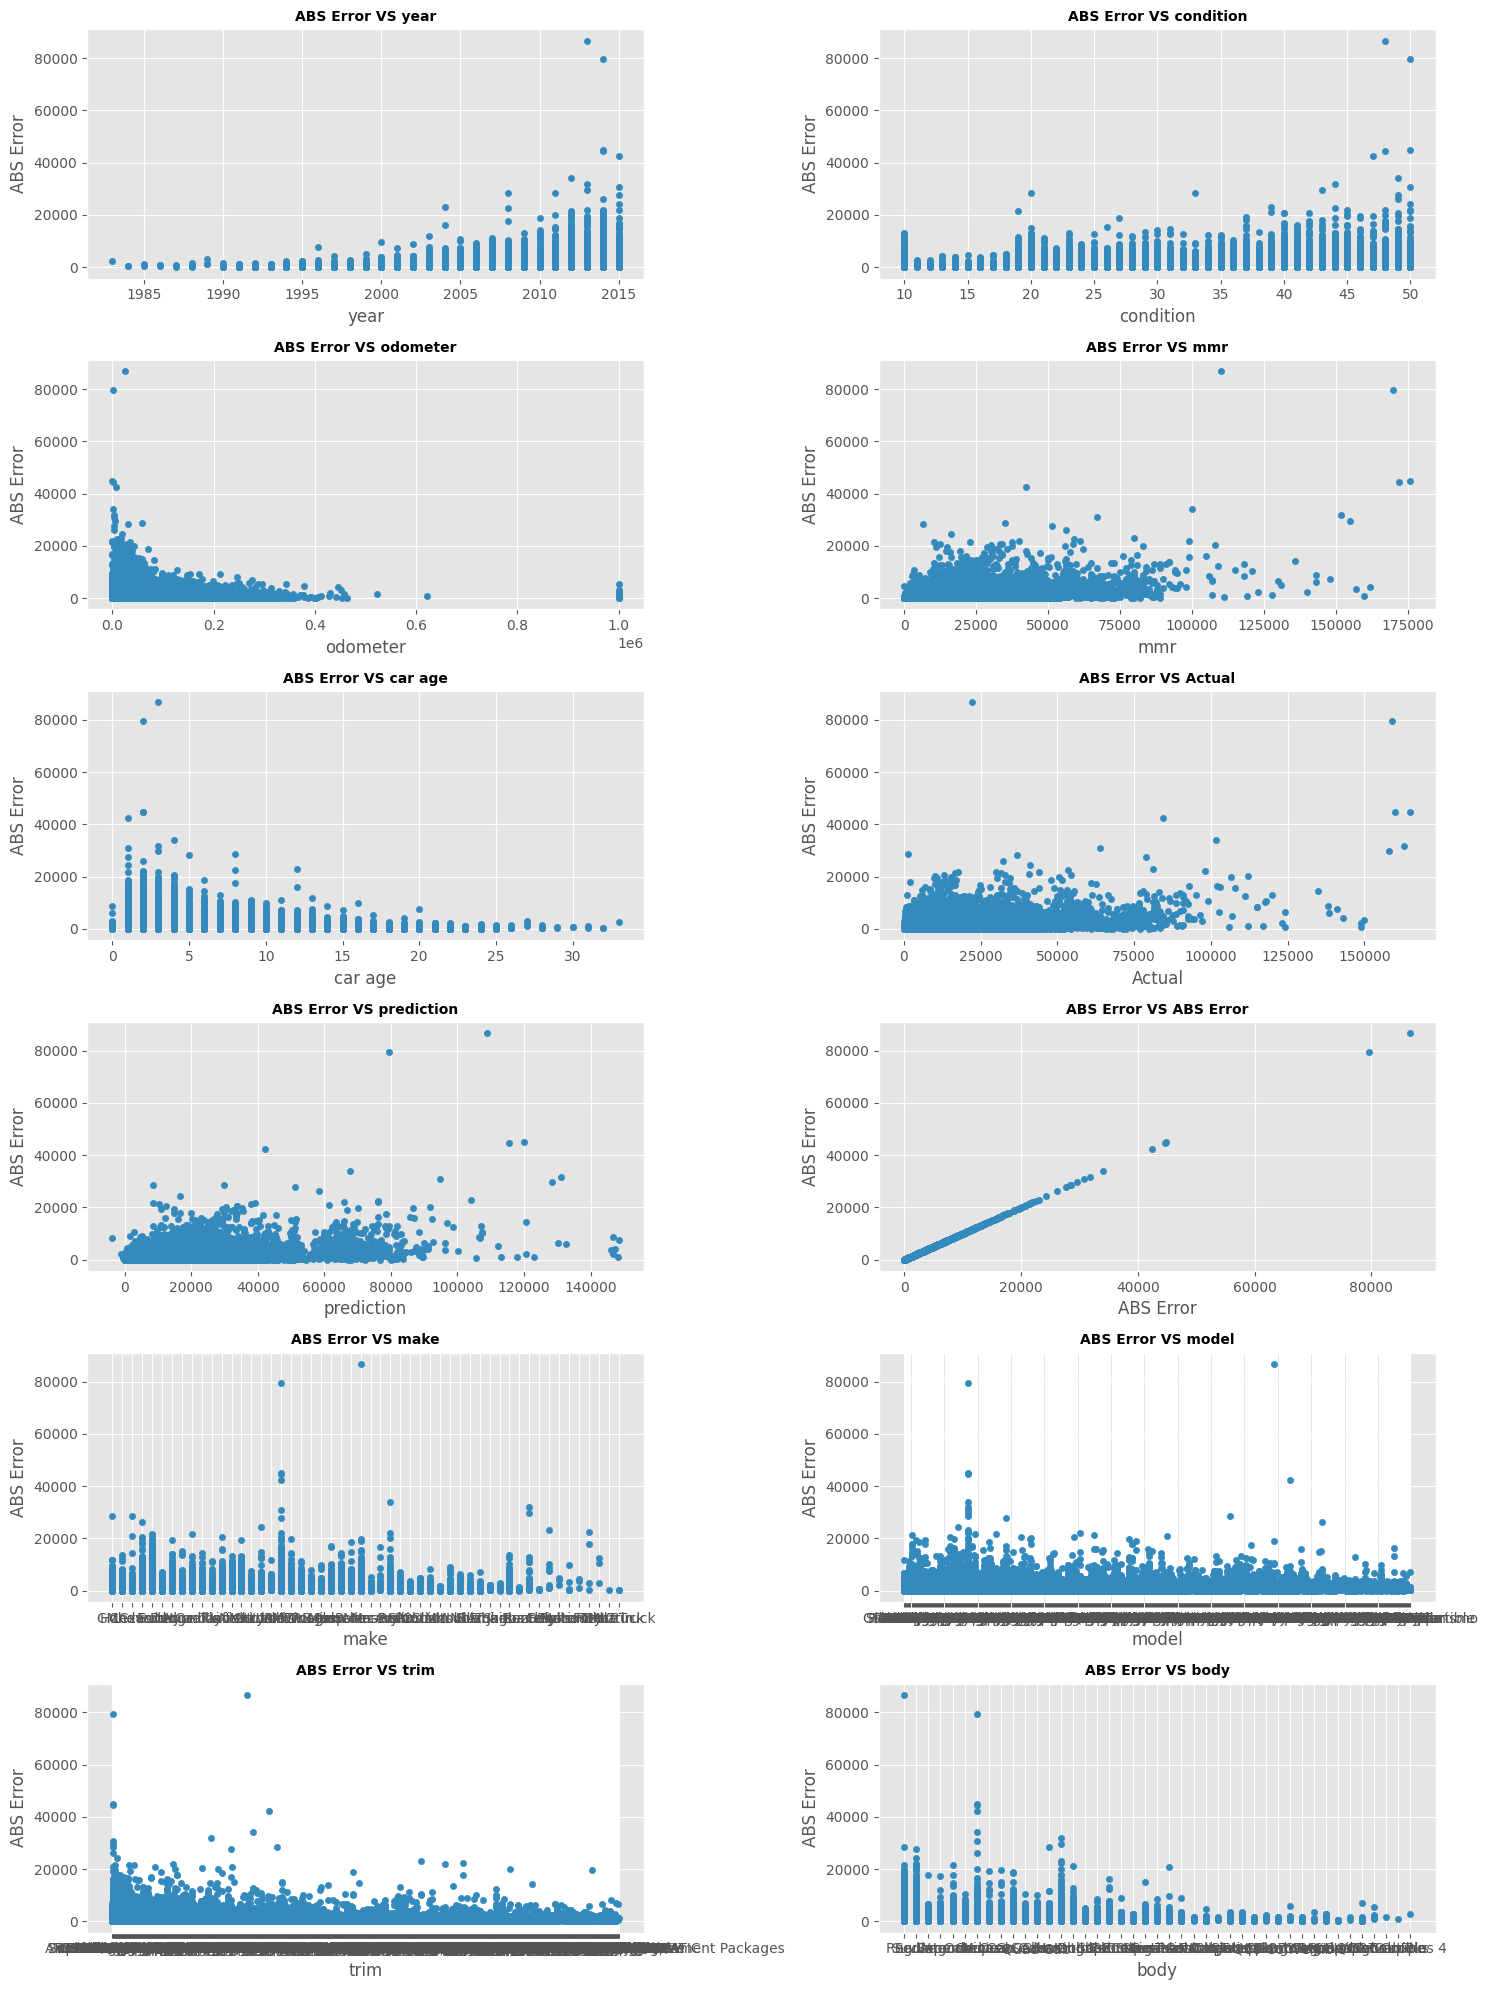

In [117]:
fig,axes=plt.subplots(6,2,figsize=(15,20))

for col,ax in zip(X_test.columns,axes.ravel()):

    X_test.plot.scatter(ax=ax,y='ABS Error',x=col)
    ax.set_title(f'ABS Error VS {col}',fontweight='bold',size=10)

plt.tight_layout()
plt.show()

In [109]:
for col in X_test.select_dtypes(object).columns:
    grouped=X_test.groupby(col)['ABS Error'].median().sort_values(ascending=False).head(5)
    print(grouped)
    print('\n\n')

#highest absolute errors in cateogrical features

make
Tesla           10680.464844
Aston Martin    10187.031250
Ferrari          7426.265625
Fisker           3945.343750
Bentley          3661.587891
Name: ABS Error, dtype: float64



model
G-Class              6172.097656
911                  3663.046875
QX80                 3093.117188
Corvette Stingray    3049.402344
M6                   2837.631836
Name: ABS Error, dtype: float64



trim
N400 Roadster         20079.730469
s/c sc                19755.203125
Spider                16657.734375
Autobiography LWB     14355.507812
5.2 quattro Spyder    13478.753906
Name: ABS Error, dtype: float64



body
Cab Plus 4     2766.743164
G37 Coupe      1779.303711
Q60 Coupe      1737.447266
Mega Cab       1689.640869
Cts-V Coupe    1408.875000
Name: ABS Error, dtype: float64



transmission
manual       697.623047
automatic    619.174194
Name: ABS Error, dtype: float64



state
AL    1090.081543
AB     846.136719
PR     831.506836
NS     829.032227
UT     823.764160
Name: ABS Error, dtype: flo